In [2]:
library(lubridate) # For handling Date variables
library(ggplot2)
library(scales) # For percent_format()
library(RColorBrewer)
library(TTR) # for EMA (Exponential Moving Average)
library(cowplot)


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date


Attaching package: 'cowplot'

The following object is masked from 'package:ggplot2':

    ggsave



In [3]:
library(ggpubr)
theme_set(theme_pubr())

Loading required package: magrittr

Attaching package: 'ggpubr'

The following object is masked from 'package:cowplot':

    get_legend



In [4]:
df_dist1 <- read.csv(file="sargento-meteo_14-18.csv", sep=",", header=TRUE, skip=3, stringsAsFactors=FALSE)

In [5]:
str(df_dist1)

'data.frame':	202970 obs. of  20 variables:
 $ X27.04.2014: chr  "27/04/2014" "27/04/2014" "27/04/2014" "27/04/2014" ...
 $ X19.30.00  : chr  "19:40:00" "19:50:00" "20:00:00" "20:10:00" ...
 $ X0         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ X12.36     : num  12.3 12.4 12.4 12.4 12.4 ...
 $ X28.13     : num  28 27.9 27.8 27.8 27.8 ...
 $ X22.82     : num  23.3 23.9 25.1 25.5 25.6 ...
 $ X0.1       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X0.077     : num  0.716 0.745 0.775 0.802 0.853 ...
 $ X118       : num  115 113 113 112 115 ...
 $ X0.005     : num  4.67 4.38 5.18 5.18 4.97 ...
 $ X28.13.1   : num  28 27.8 27.7 27.8 27.8 ...
 $ X27.81     : num  27.8 27.7 27.6 27.6 27.6 ...
 $ X28.01     : num  28 27.9 27.8 27.8 27.8 ...
 $ X0.413     : num  2.89 2.144 1.16 0.381 0.919 ...
 $ X0.2       : num  0 0 0 0 0 0 0 0 0 0.001 ...
 $ X27.99     : num  27.9 27.7 27.6 27.8 27.8 ...
 $ X28.05     : num  28 27.7 27.7 27.9 27.8 ...
 $ X28.04     : num  28 27.7 27.7 27.9 27.8 ...
 $ X0.572     : num  1.081 

In [6]:
df <- df_dist1[c(1,2,5,6,7,14,16)]
names(df) <- c("Fecha", "Hora", "AirTemp", "RH", "Precip", "NetRad", "SoilT10")

In [7]:
str(df)

'data.frame':	202970 obs. of  7 variables:
 $ Fecha  : chr  "27/04/2014" "27/04/2014" "27/04/2014" "27/04/2014" ...
 $ Hora   : chr  "19:40:00" "19:50:00" "20:00:00" "20:10:00" ...
 $ AirTemp: num  28 27.9 27.8 27.8 27.8 ...
 $ RH     : num  23.3 23.9 25.1 25.5 25.6 ...
 $ Precip : num  0 0 0 0 0 0 0 0 0 0 ...
 $ NetRad : num  2.89 2.144 1.16 0.381 0.919 ...
 $ SoilT10: num  27.9 27.7 27.6 27.8 27.8 ...


In [8]:
df$NewDate <- as.POSIXct(paste0(df$Fecha, df$Hora),format="%d/%m/%Y %H:%M")

In [9]:
str(df)

'data.frame':	202970 obs. of  8 variables:
 $ Fecha  : chr  "27/04/2014" "27/04/2014" "27/04/2014" "27/04/2014" ...
 $ Hora   : chr  "19:40:00" "19:50:00" "20:00:00" "20:10:00" ...
 $ AirTemp: num  28 27.9 27.8 27.8 27.8 ...
 $ RH     : num  23.3 23.9 25.1 25.5 25.6 ...
 $ Precip : num  0 0 0 0 0 0 0 0 0 0 ...
 $ NetRad : num  2.89 2.144 1.16 0.381 0.919 ...
 $ SoilT10: num  27.9 27.7 27.6 27.8 27.8 ...
 $ NewDate: POSIXct, format: "2014-04-27 19:40:00" "2014-04-27 19:50:00" ...


In [10]:
df1 <- df[c(8,3,4,5,6,7)]
names(df1) <- c("NDate", "AirTemp", "RH", "Precip", "NetRad", "SoilT10")

In [11]:
str(df1)

'data.frame':	202970 obs. of  6 variables:
 $ NDate  : POSIXct, format: "2014-04-27 19:40:00" "2014-04-27 19:50:00" ...
 $ AirTemp: num  28 27.9 27.8 27.8 27.8 ...
 $ RH     : num  23.3 23.9 25.1 25.5 25.6 ...
 $ Precip : num  0 0 0 0 0 0 0 0 0 0 ...
 $ NetRad : num  2.89 2.144 1.16 0.381 0.919 ...
 $ SoilT10: num  27.9 27.7 27.6 27.8 27.8 ...


In [12]:
df1$NMonth <- factor(month(df1$NDate), 
                          labels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"))
#v1 <- (df1$NDate)
#df2 <- transform(df1, Year = year(v1), Month = month.abb[month(v1)])

In [13]:
df1

NDate,AirTemp,RH,Precip,NetRad,SoilT10,NMonth
2014-04-27 19:40:00,28.01,23.26,0,2.890,27.91,Apr
2014-04-27 19:50:00,27.89,23.94,0,2.144,27.66,Apr
2014-04-27 20:00:00,27.76,25.12,0,1.160,27.64,Apr
2014-04-27 20:10:00,27.80,25.50,0,0.381,27.80,Apr
2014-04-27 20:20:00,27.83,25.63,0,0.919,27.77,Apr
2014-04-27 20:30:00,27.79,25.73,0,0.899,27.72,Apr
2014-04-27 20:40:00,27.73,25.63,0,-0.032,27.41,Apr
2014-04-27 20:50:00,26.99,27.53,0,-1.662,26.37,Apr
2014-04-27 21:00:00,26.26,27.80,0,-1.060,26.18,Apr
2014-04-27 21:10:00,26.71,26.68,0,-0.068,27.20,Apr


Warning message:
"Removed 6 rows containing non-finite values (stat_boxplot)."

Warning message:
"Removed 6 rows containing non-finite values (stat_density)."

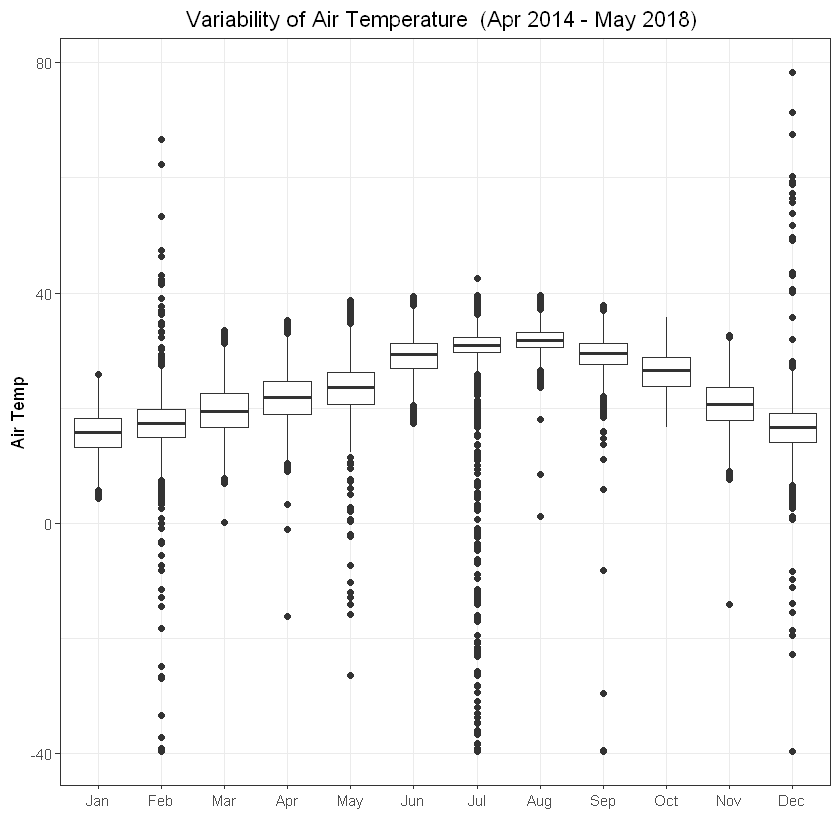

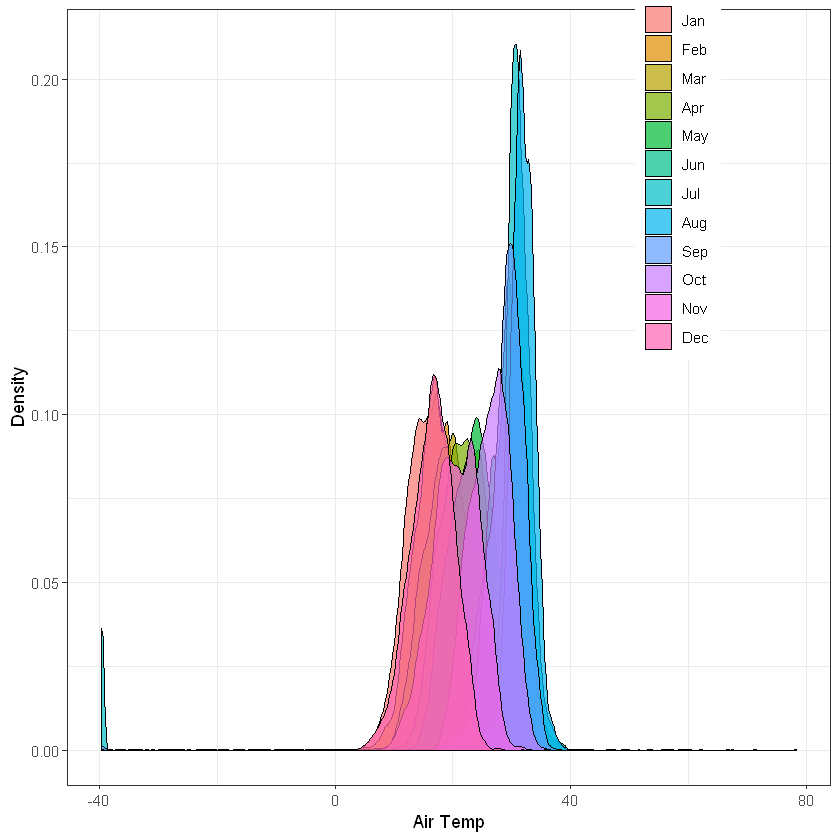

In [14]:
airTemp1 <- ggplot(df1, aes(x = NMonth, y = AirTemp)) + ggtitle ("                     Variability of Air Temperature  (Apr 2014 - May 2018)")+
  geom_boxplot() + theme_bw()+labs(x="", y="Air Temp")

airTemp2 <- ggplot(df1, aes(x = AirTemp, fill = NMonth)) +
  geom_density(alpha = 0.7) + theme_bw() +
  theme(legend.position = c(0.8, 0.8))+labs(x="Air Temp", y="Density")

airTemp1
airTemp2

#plot_grid(airTemp1, airTemp2, labels = "AUTO")

In [15]:
summary(df1$AirTemp)
sd(df1$AirTemp, na.rm = TRUE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -39.63   18.03   23.11   23.06   29.04   78.31       6 

[1] 7.255787

In [16]:
summary(df1$SoilT10)
sd(df1$SoilT10, na.rm = TRUE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   8.34   17.84   22.48   22.67   27.85   56.75      10 

[1] 5.535272

In [17]:
summary(df1$RH)
sd(df1$RH, na.rm = TRUE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.102  45.850  59.380  57.421  69.970 160.300       6 

[1] 17.48453

In [18]:
summary(df1$NetRad)
sd(df1$NetRad, na.rm = TRUE)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
-1642.00   -58.98   -30.72   123.68   302.50  1553.00     7362 

[1] 251.6154

Warning message:
"Removed 2868 rows containing non-finite values (stat_boxplot)."

Warning message:
"Removed 245 rows containing non-finite values (stat_boxplot)."

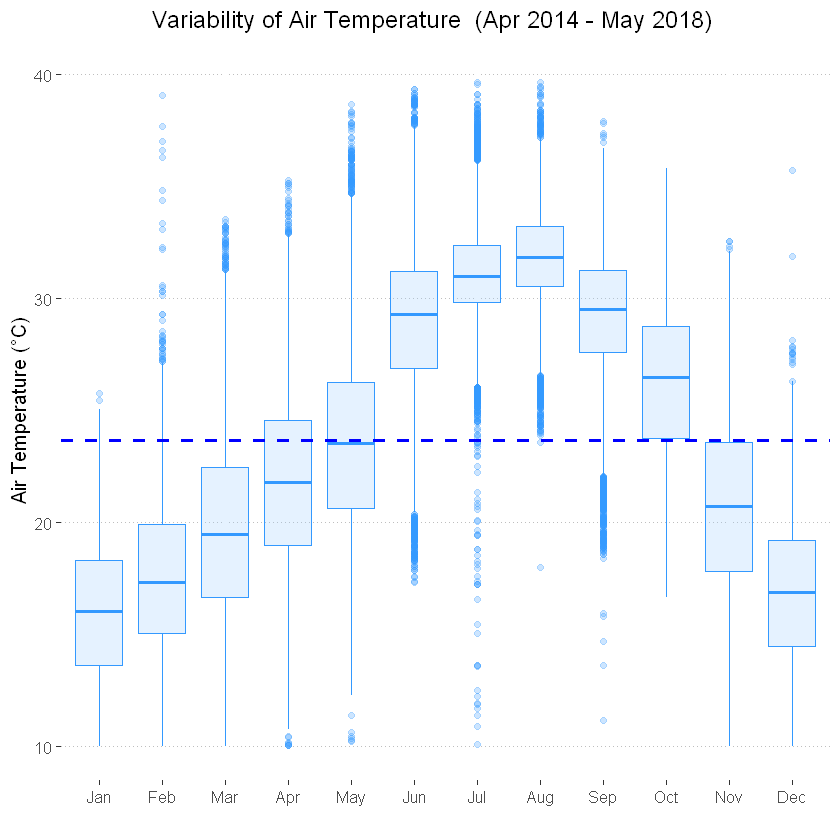

Warning message:
"Removed 55 rows containing non-finite values (stat_boxplot)."

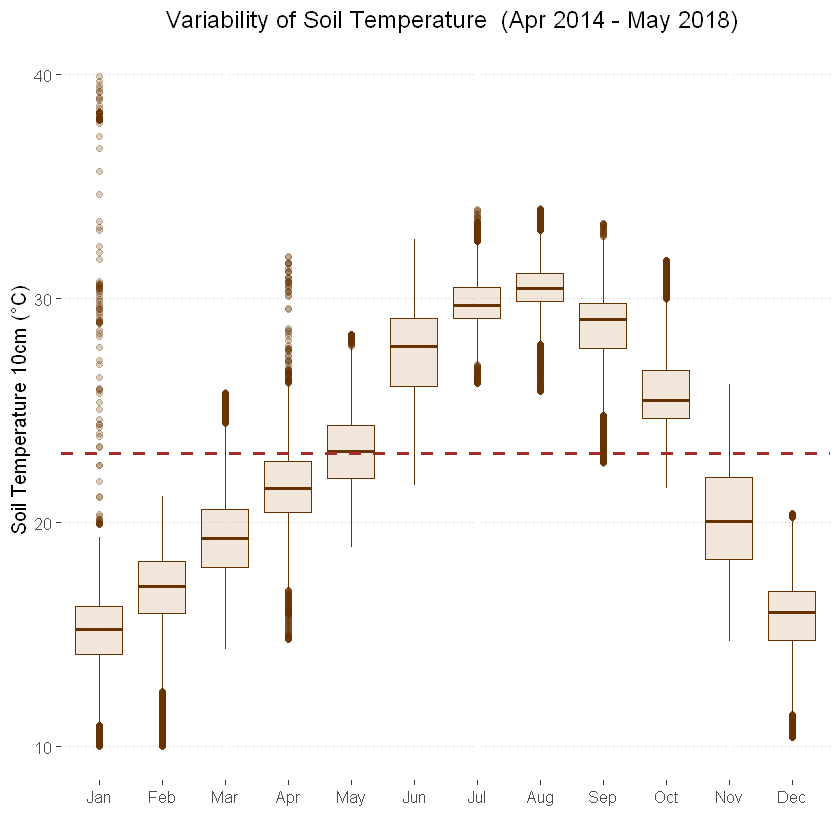

Warning message:
"Removed 7567 rows containing non-finite values (stat_boxplot)."

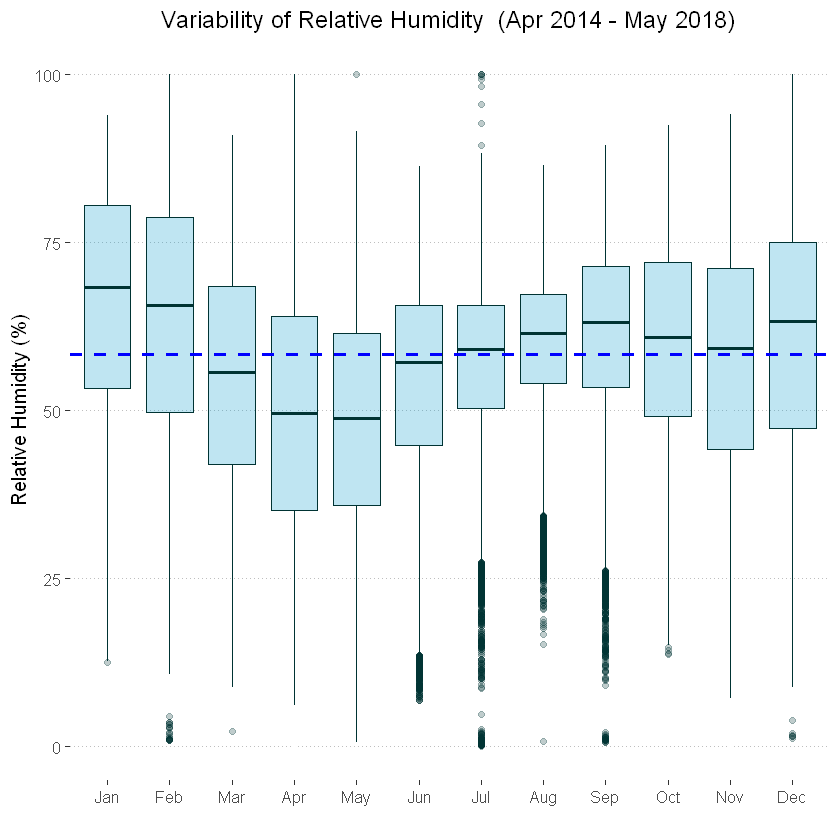

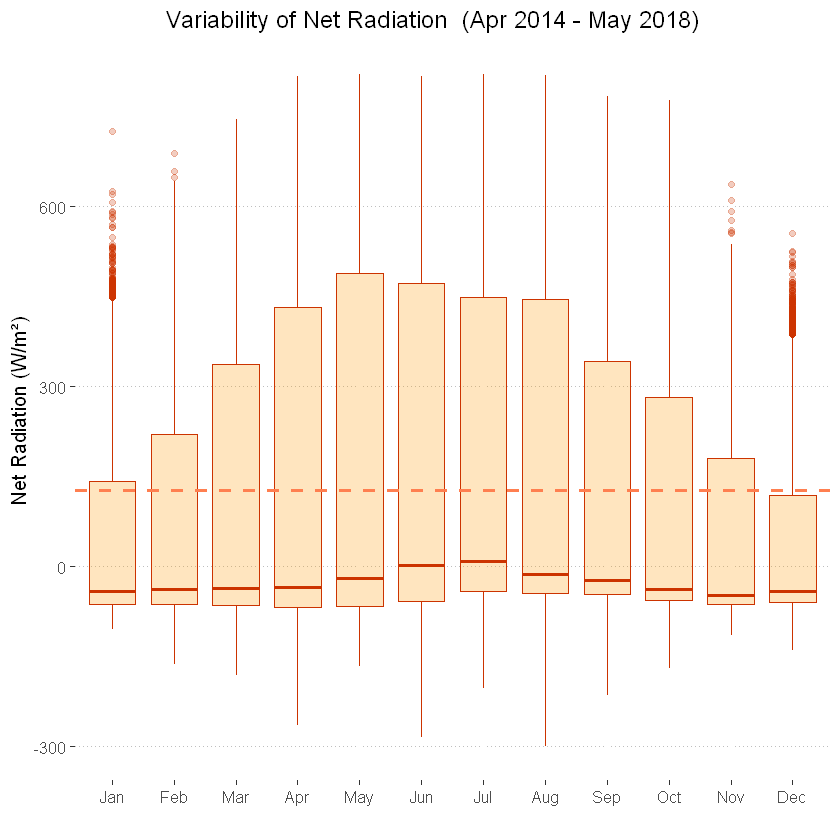

In [19]:
fill <- "#99CCFF"
line <- "#3399FF"
airT <- ggplot(df1, aes(x = NMonth, y = AirTemp))+ggtitle ("             Variability of Air Temperature  (Apr 2014 - May 2018)") +
        geom_boxplot(fill = fill, colour = line, alpha=0.25) +
        # scale_x_discrete(name = "Month") +
       # ggtitle("Air Temperature") +
        geom_hline(yintercept=23.661, linetype="dashed", color = "blue", size=1.0) +
        ylim(10, 40) + theme_pubclean() +
        labs(x="", y="Air Temperature (°C)") 
       # geom_text(x=8, y=20, label="Ave Temp = 23.661", aes(fontface=1)) 

fill <- "#CC9966"
line <- "#663300"
soilT <- ggplot(df1, aes(x = NMonth, y = SoilT10))+ggtitle ("               Variability of Soil Temperature  (Apr 2014 - May 2018)")  +
        geom_boxplot(fill = fill, colour = line, alpha=0.25) +
       # scale_x_discrete(name = "Month") +
       #ggtitle("Soil Temperature 10cm") +
        geom_hline(yintercept=23.09, linetype="dashed", color = "brown", size=1.0) +
        ylim(10, 40) + theme_pubclean() +
        labs(x="", y="Soil Temperature 10cm (°C)")

fill <- "#0099CC"
line <- "#003333"
relH <- ggplot(df1, aes(x = NMonth, y = RH)) +ggtitle ("             Variability of Relative Humidity  (Apr 2014 - May 2018)")+
        geom_boxplot(fill = fill, colour = line, alpha=0.25) +
       # scale_x_discrete(name = "Month") +
       # ggtitle("Relative Humidity") +
        geom_hline(yintercept=58.36, linetype="dashed", color = "blue", size=1.0) +
        ylim(0, 100) + theme_pubclean() +
        labs(x="", y="Relative Humidity (%)")

fill <- "#FF9900"
line <- "#CC3300"
netRad <- ggplot(df1, aes(x = NMonth, y = NetRad)) +ggtitle ("             Variability of Net Radiation  (Apr 2014 - May 2018)")+
        geom_boxplot(fill = fill, colour = line, alpha=0.25) +
       # scale_x_discrete(name = "Month") +
        # ggtitle("Net Radiation") +
        geom_hline(yintercept=126.56, linetype="dashed", color = "coral", size=1.0) +
        ylim(-300, 820) + theme_pubclean() +
        labs(x="", y="Net Radiation (W/m²)")

airT
soilT
relH
netRad

#plot_grid(airT, soilT, labels = "AUTO")

In [20]:
MoP<- aggregate(df1[c("Precip")], 
                         by = df1[c("NMonth")],
                         FUN=sum, na.rm=TRUE)

In [21]:
str(MoP)

'data.frame':	12 obs. of  2 variables:
 $ NMonth: Factor w/ 12 levels "Jan","Feb","Mar",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Precip: num  37.08 41.15 8.38 4.32 1.27 ...


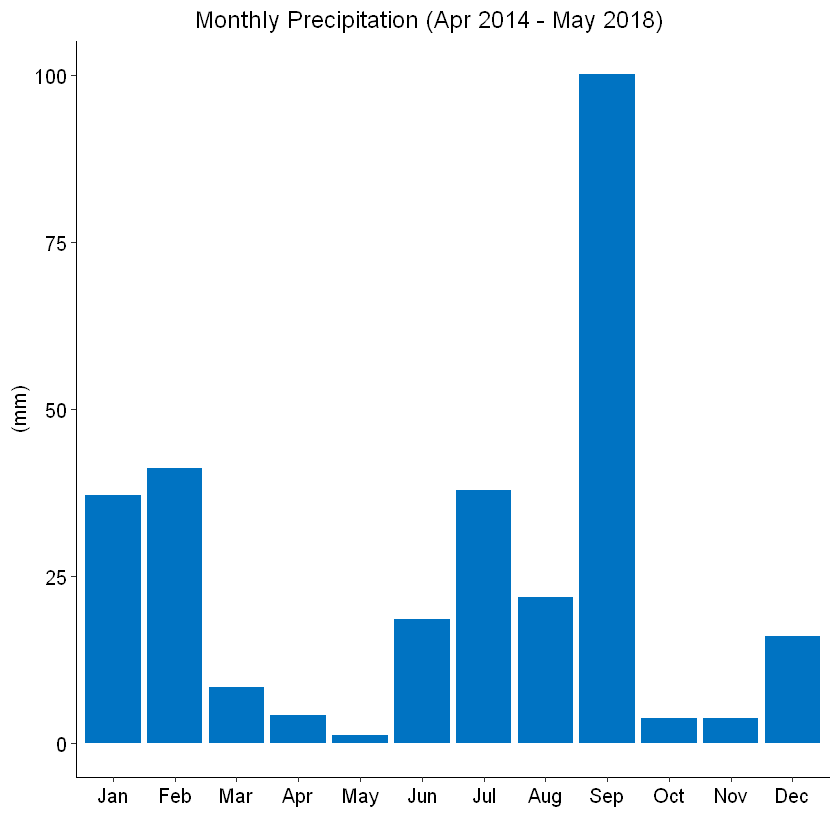

In [22]:
ggplot(MoP, aes(x = NMonth, y = Precip)) +
  geom_bar(fill = "#0073C2FF", stat = "identity") +
 labs(title="                 Monthly Precipitation (Apr 2014 - May 2018)") +
  labs(x="", y="(mm)")

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

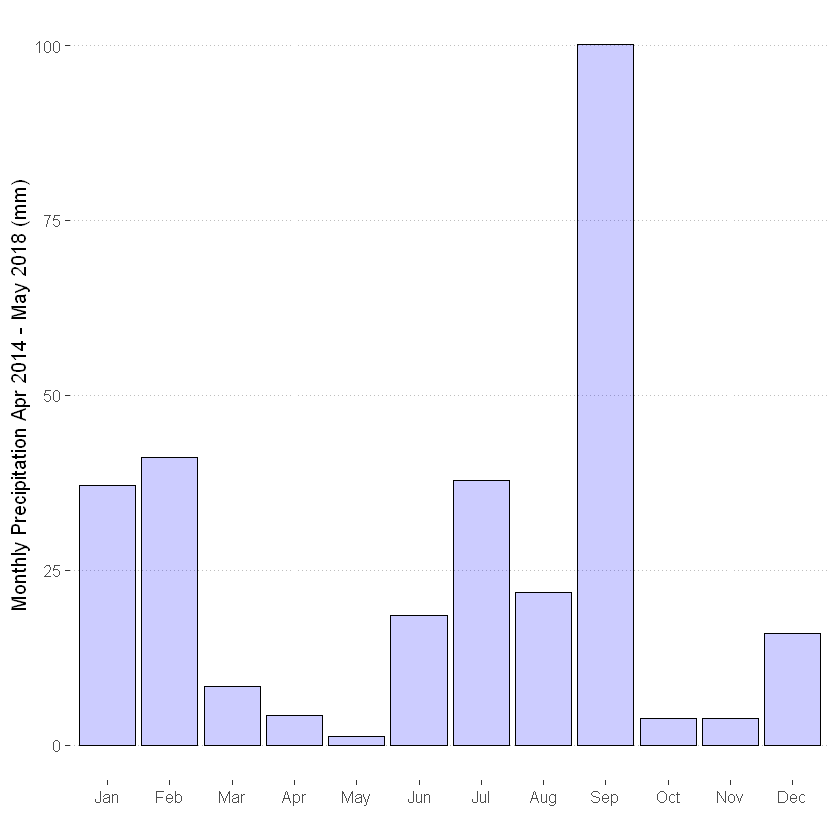

In [23]:
ggplot(data=MoP, aes(x=MoP$NMonth, y=MoP$Precip)) + 
  geom_histogram(col="black", 
                 fill="blue", 
                 alpha = .2, stat = "identity") + 
  #labs(title="Monthly Precipitation") +
  labs(x="", y="Monthly Precipitation Apr 2014 - May 2018 (mm)") + theme_pubclean()

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

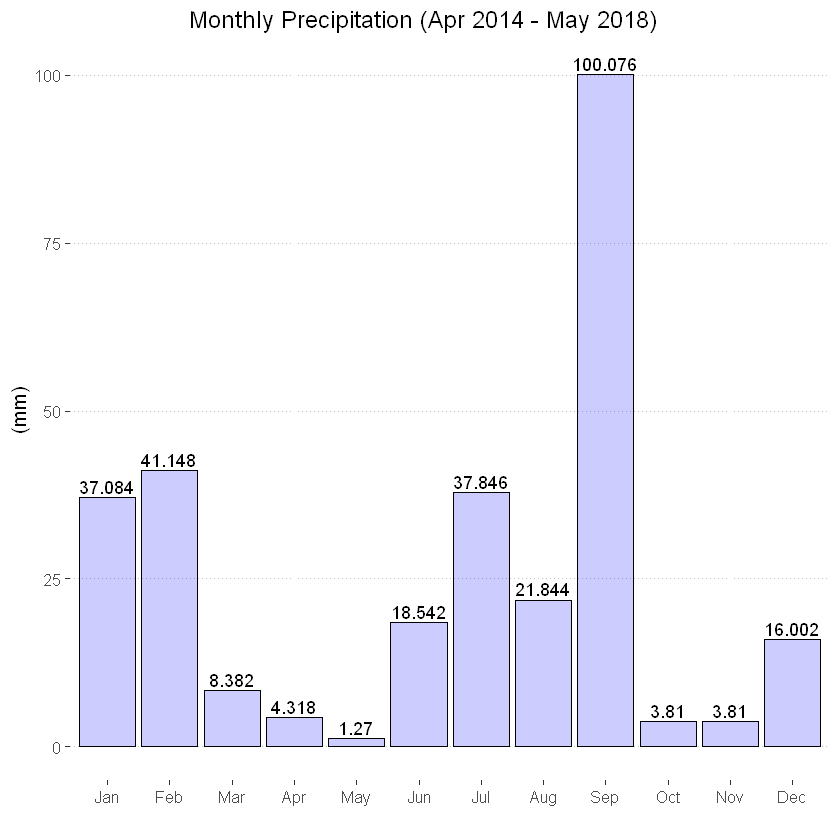

In [24]:
ggplot(MoP, aes(x = NMonth, y = Precip)) +
  # geom_bar(fill = "#0073C2FF", stat = "identity") +
  geom_text(aes(label = Precip), vjust = -0.3) + 
  labs(x="", y="(mm)") + theme_pubclean() +
  labs(title="                 Monthly Precipitation (Apr 2014 - May 2018)") +
  geom_histogram(col="black", 
                 fill="blue", 
                 alpha = .2, stat = "identity")

In [25]:
str(df_dist1)

'data.frame':	202970 obs. of  20 variables:
 $ X27.04.2014: chr  "27/04/2014" "27/04/2014" "27/04/2014" "27/04/2014" ...
 $ X19.30.00  : chr  "19:40:00" "19:50:00" "20:00:00" "20:10:00" ...
 $ X0         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ X12.36     : num  12.3 12.4 12.4 12.4 12.4 ...
 $ X28.13     : num  28 27.9 27.8 27.8 27.8 ...
 $ X22.82     : num  23.3 23.9 25.1 25.5 25.6 ...
 $ X0.1       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X0.077     : num  0.716 0.745 0.775 0.802 0.853 ...
 $ X118       : num  115 113 113 112 115 ...
 $ X0.005     : num  4.67 4.38 5.18 5.18 4.97 ...
 $ X28.13.1   : num  28 27.8 27.7 27.8 27.8 ...
 $ X27.81     : num  27.8 27.7 27.6 27.6 27.6 ...
 $ X28.01     : num  28 27.9 27.8 27.8 27.8 ...
 $ X0.413     : num  2.89 2.144 1.16 0.381 0.919 ...
 $ X0.2       : num  0 0 0 0 0 0 0 0 0 0.001 ...
 $ X27.99     : num  27.9 27.7 27.6 27.8 27.8 ...
 $ X28.05     : num  28 27.7 27.7 27.9 27.8 ...
 $ X28.04     : num  28 27.7 27.7 27.9 27.8 ...
 $ X0.572     : num  1.081 

In [26]:
df3 <-  df_dist1[,c(8,9)]
names(df3) <- c("WS_ms_S_WVT", "WindDir_D1_WVT")

In [27]:
df_Wind <- df3

In [28]:
str(df_Wind)

'data.frame':	202970 obs. of  2 variables:
 $ WS_ms_S_WVT   : num  0.716 0.745 0.775 0.802 0.853 ...
 $ WindDir_D1_WVT: num  115 113 113 112 115 ...


In [29]:
df_Wind <- df_Wind[complete.cases(df_Wind), ]
names(df_Wind) <- c("spd", "dir")
str(df_Wind)

'data.frame':	202964 obs. of  2 variables:
 $ spd: num  0.716 0.745 0.775 0.802 0.853 ...
 $ dir: num  115 113 113 112 115 ...


In [30]:
summary(df_Wind)

      spd              dir       
 Min.   : 0.000   Min.   :  0.0  
 1st Qu.: 1.253   1st Qu.:100.4  
 Median : 2.151   Median :176.4  
 Mean   : 2.535   Mean   :187.8  
 3rd Qu.: 3.554   3rd Qu.:306.5  
 Max.   :16.470   Max.   :360.0  

In [31]:
install.packages("ggthemes") # Install

Installing package into 'C:/Users/USER/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'ggthemes' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\USER\AppData\Local\Temp\RtmpIxKtYu\downloaded_packages


In [32]:
require(ggplot2)
require(RColorBrewer)
require(ggthemes)

Loading required package: ggthemes

Attaching package: 'ggthemes'

The following object is masked from 'package:cowplot':

    theme_map



In [33]:
plot.windrose <- function(data,
                      spd,
                      dir,
                      spdres = 1.0,
                      dirres = 30,
                      spdmin = 1,
                      spdmax = 8,
                      spdseq = NULL,
                      palette = "YlGnBu",
                      countmax = NA,
                      debug = 0){


# Look to see what data was passed in to the function
  if (is.numeric(spd) & is.numeric(dir)){
    # assume that we've been given vectors of the speed and direction vectors
    data <- data.frame(spd = spd,
                       dir = dir)
    spd = "spd"
    dir = "dir"
  } else if (exists("data")){
    # Assume that we've been given a data frame, and the name of the speed 
    # and direction columns. This is the format we want for later use.    
  }  

  # Tidy up input data ----
  n.in <- NROW(data)
  dnu <- (is.na(data[[spd]]) | is.na(data[[dir]]))
  data[[spd]][dnu] <- NA
  data[[dir]][dnu] <- NA

  # figure out the wind speed bins ----
  if (missing(spdseq)){
    spdseq <- seq(spdmin,spdmax,spdres)
  } else {
    if (debug >0){
      cat("Using custom speed bins \n")
    }
  }
  # get some information about the number of bins, etc.
  n.spd.seq <- length(spdseq)
  n.colors.in.range <- n.spd.seq - 1

  # create the color map
  spd.colors <- colorRampPalette(brewer.pal(min(max(3,
                                                    n.colors.in.range),
                                                min(9,
                                                    n.colors.in.range)),                                               
                                            palette))(n.colors.in.range)

  if (max(data[[spd]],na.rm = TRUE) > spdmax){    
    spd.breaks <- c(spdseq,
                    max(data[[spd]],na.rm = TRUE))
    spd.labels <- c(paste(c(spdseq[1:n.spd.seq-1]),
                          '-',
                          c(spdseq[2:n.spd.seq])),
                    paste(spdmax,
                          "-",
                          max(data[[spd]],na.rm = TRUE)))
    spd.colors <- c(spd.colors, "grey50")
  } else{
    spd.breaks <- spdseq
    spd.labels <- paste(c(spdseq[1:n.spd.seq-1]),
                        '-',
                        c(spdseq[2:n.spd.seq]))    
  }
  data$spd.binned <- cut(x = data[[spd]],
                         breaks = spd.breaks,
                         labels = spd.labels,
                         ordered_result = TRUE)
  # clean up the data
  data. <- na.omit(data)

  # figure out the wind direction bins
  dir.breaks <- c(-dirres/2,
                  seq(dirres/2, 360-dirres/2, by = dirres),
                  360+dirres/2)  
  dir.labels <- c(paste(360-dirres/2,"-",dirres/2),
                  paste(seq(dirres/2, 360-3*dirres/2, by = dirres),
                        "-",
                        seq(3*dirres/2, 360-dirres/2, by = dirres)),
                  paste(360-dirres/2,"-",dirres/2))
  # assign each wind direction to a bin
  dir.binned <- cut(data[[dir]],
                    breaks = dir.breaks,
                    ordered_result = TRUE)
  levels(dir.binned) <- dir.labels
  data$dir.binned <- dir.binned

  # Run debug if required ----
  if (debug>0){    
    cat(dir.breaks,"\n")
    cat(dir.labels,"\n")
    cat(levels(dir.binned),"\n")       
  }  

  # deal with change in ordering introduced somewhere around version 2.2
  if(packageVersion("ggplot2") > "2.2"){    
    cat("Hadley broke my code\n")
    data$spd.binned = with(data, factor(spd.binned, levels = rev(levels(spd.binned))))
    spd.colors = rev(spd.colors)
  }

  # create the plot ----
  p.windrose <- ggplot(data = data,
                       aes(x = dir.binned,
                           fill = spd.binned)) +
    geom_bar() + 
    scale_x_discrete(drop = FALSE,
                     labels = waiver()) +
    coord_polar(start = -((dirres/2)/360) * 2*pi) +
    scale_fill_manual(name = "Speed (m/s)", 
                      values = spd.colors,
                      drop = FALSE) +
    #theme_bw() +
    theme(axis.title.x = element_blank(),
          #panel.border = element_rect(colour = "blank"),
          panel.grid.major = element_line(colour="grey65"))

  # adjust axes if required
  if (!is.na(countmax)){
    p.windrose <- p.windrose +
      ylim(c(0,countmax))
  }

  # print the plot
  print(p.windrose)  

  # return the handle to the wind rose
  return(p.windrose)
}

Hadley broke my code


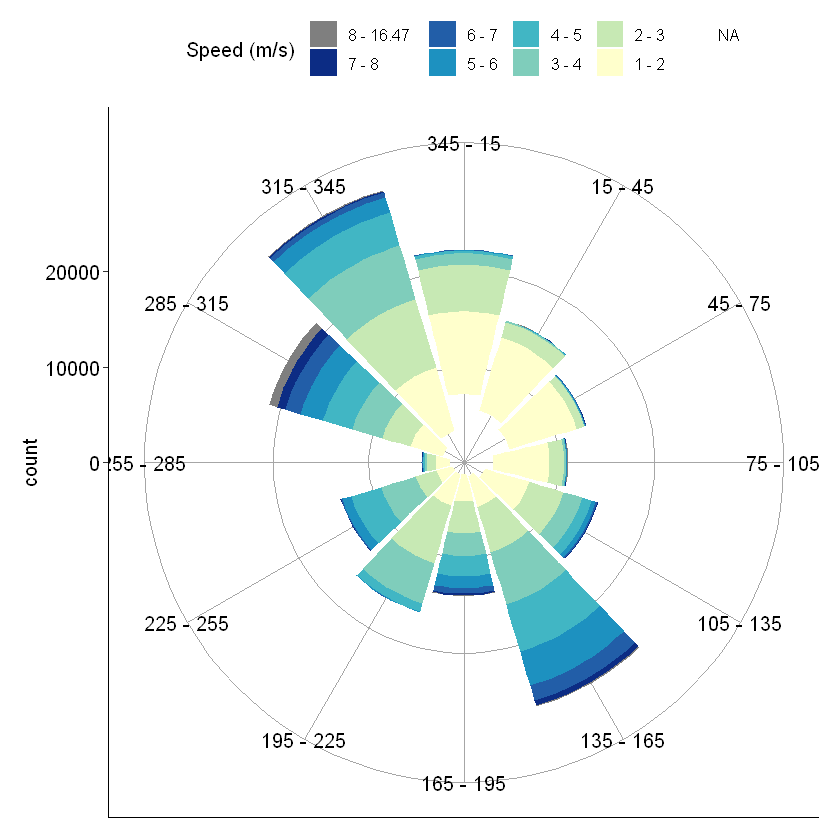

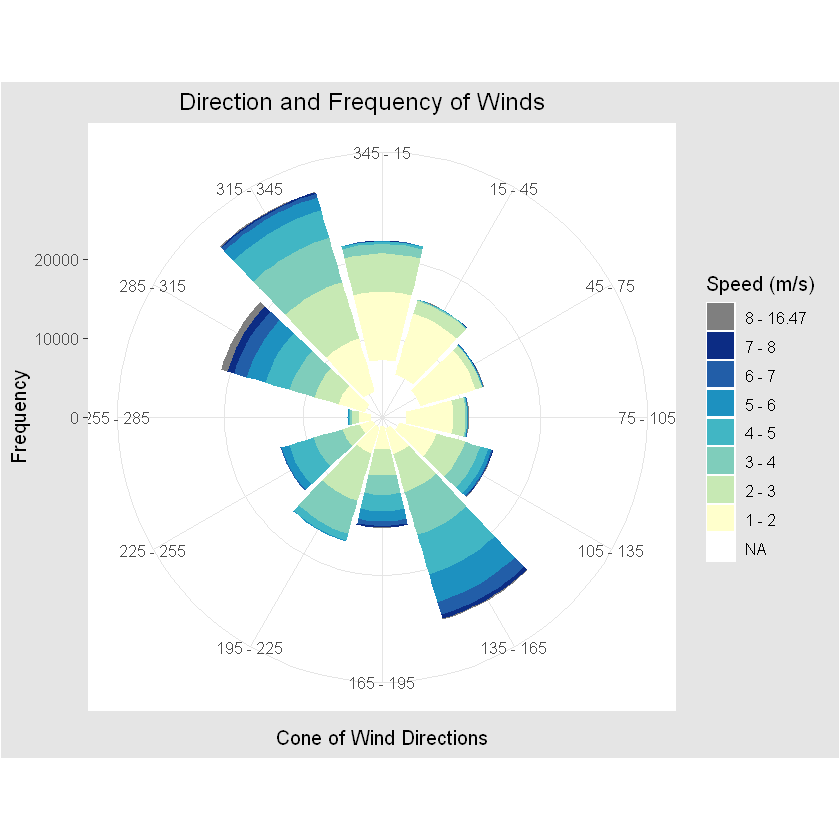

In [34]:
# try the default settings
p1 <- plot.windrose(spd = df_Wind$spd, 
                   dir = df_Wind$dir)+
                   ggtitle("             Direction and Frequency of Winds")+
                   ylab("Frequency")  + # for the main title 
                   xlab("Cone of Wind Directions")
p1 + theme_igray() + scale_colour_wsj("colors6", "")

Hadley broke my code


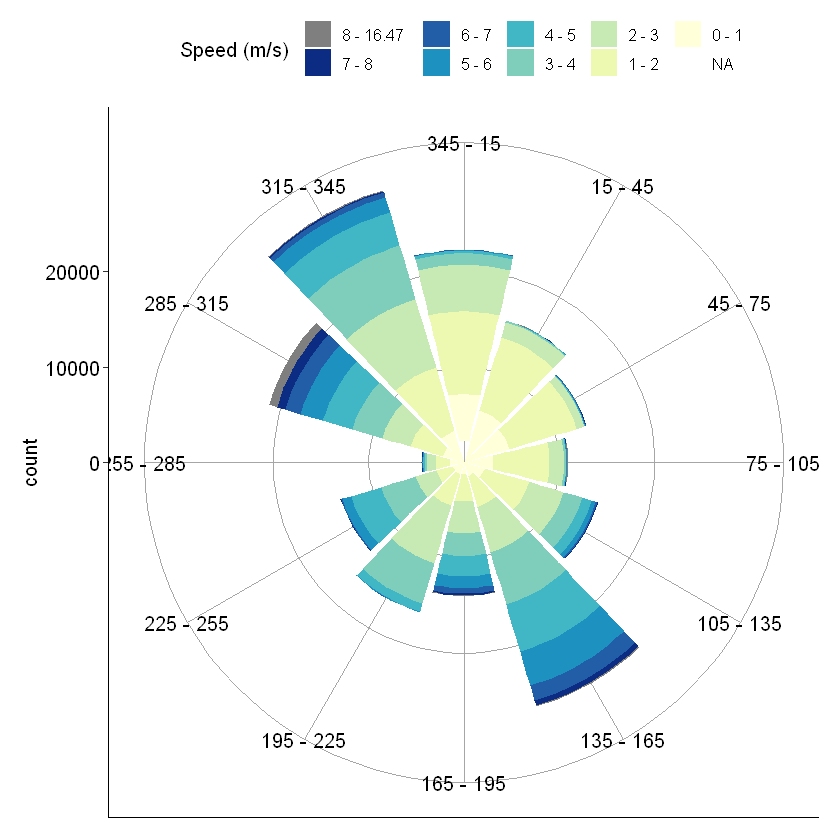

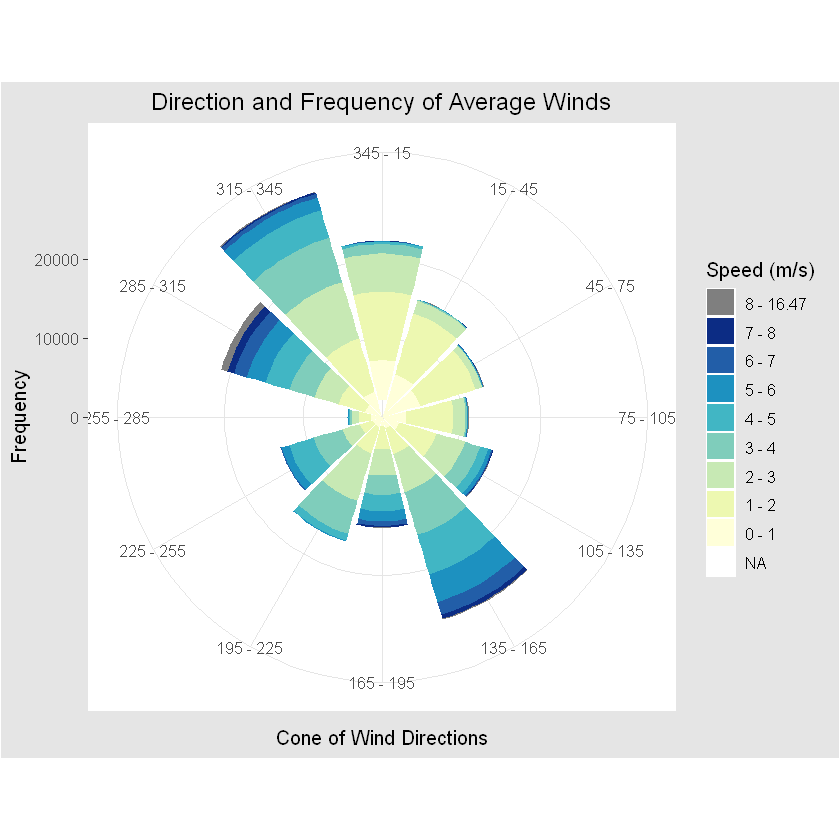

In [41]:
p2 <- plot.windrose(data=df_Wind, spd = df_Wind$spd,
                   dir = df_Wind$dir,
#                   spdseq = c(0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6)) +
                     spdseq = c(0,1,2,3,4,5,6, 7, 8)) +
                    theme_gray() +
                   ggtitle("         Direction and Frequency of Average Winds") +
                  #ggtitle(" ") +
                   ylab("Frequency")  + # for the main title 
                   xlab("Cone of Wind Directions")
                 #xlab(" ")
p2 + theme_igray() 

In [36]:
df_dis <- read.csv(file="sargento-meteo_14-18.csv", sep=",", header=TRUE, skip=3, stringsAsFactors=FALSE)

In [37]:
str(df_dis)

'data.frame':	202970 obs. of  20 variables:
 $ X27.04.2014: chr  "27/04/2014" "27/04/2014" "27/04/2014" "27/04/2014" ...
 $ X19.30.00  : chr  "19:40:00" "19:50:00" "20:00:00" "20:10:00" ...
 $ X0         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ X12.36     : num  12.3 12.4 12.4 12.4 12.4 ...
 $ X28.13     : num  28 27.9 27.8 27.8 27.8 ...
 $ X22.82     : num  23.3 23.9 25.1 25.5 25.6 ...
 $ X0.1       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X0.077     : num  0.716 0.745 0.775 0.802 0.853 ...
 $ X118       : num  115 113 113 112 115 ...
 $ X0.005     : num  4.67 4.38 5.18 5.18 4.97 ...
 $ X28.13.1   : num  28 27.8 27.7 27.8 27.8 ...
 $ X27.81     : num  27.8 27.7 27.6 27.6 27.6 ...
 $ X28.01     : num  28 27.9 27.8 27.8 27.8 ...
 $ X0.413     : num  2.89 2.144 1.16 0.381 0.919 ...
 $ X0.2       : num  0 0 0 0 0 0 0 0 0 0.001 ...
 $ X27.99     : num  27.9 27.7 27.6 27.8 27.8 ...
 $ X28.05     : num  28 27.7 27.7 27.9 27.8 ...
 $ X28.04     : num  28 27.7 27.7 27.9 27.8 ...
 $ X0.572     : num  1.081 

In [38]:
df4 <- df_dis[c(1,2,3,4,5,6,7,,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22)]
names(df) <- c("Fecha", "Hora", "AirTemp", "RH", "Precip", "NetRad", "SoilT10")

ERROR: Error in c(1, 2, 3, 4, 5, 6, 7, , 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, : argument 8 is empty
